# Normative Factors and Psychiatric Diagnoses Influence on Postmortem Brain Tissue Volumes

## II. Background
Our understanding of severe mental illness has been greatly advanced through the study of the postmortem human brain tissue (Lewis DA, *Neuropsychopharm.*, 2002; McCullumsmith, *Neuropsychopharm.* 2013). Studies of the postmortem human brain provide insight into the molecular and structural abnormalities which are thought to be the neural substrate for symptoms in these patient populations. Postmortem brain tissue samples are becoming widely recognized as providing ample opportunity to investigate these brain diseases, and a great deal of resources from the National Institute of Mental Health is going towards studies of the postmortem human brain.  

Postmortem studies of human brain provide an important bridge linking animal studies to neuroimaging and other *in vivo* approaches. One example of this link between animal studies and *in vivo* neuroimaging studies is reporting of brain volume abnomralities. There is a significant body of literature to implicate nearly every psychiatric illness with abnormalities in brain tissue volume as reported by structural MRI data, including major depressive disorder (Koolschijin PC et al., *Hum Brain Mapp.* 2009), bipolar disorder (Kempton MJ et al., *Arch Gen Psychiatry.* 2008), schizophrenia (Steen et al., *Br J Psychiatry.*, 2006; Boos et al., *Arch Gen Psychiatry.* 2007), and alcohol use disorder (Bae et al., *Exp Neurobiol.*, 2016). 

The large number of studies that report significant associations of psychiatric diagnosis with brain volume changes could reflect the true association of major mental illness with brain volume abnormalities. However, these findings might also be influenced by a variety of antemortem factors. For example, antipsychotic use has been associated with brain volume loss in monkeys chronically exposed to typical and atypical antipsychotics (Dorph-Petersen et al., *Neuropsychopharm.*, 2005). Moreover, it is widely recognized that the neuroimaging data exhibits a reporting bias in the literature (Ioannidis, *Arch Gen Psychiatry.* 2011). Thus, the abnormalities in brain tissue volume could reflect true biological differences, may be a consequence of other comorbid factors influencing brain tissue volume, or could be a product of excessive reporting bias in the literature.

Understanding how antemortem factors, such as psychiatric diagnosis, drug use, and age, together with other postmortem factors important for brain banking, influence brain tissue volume is of relevance for both clinical and basic scientists. Therefore, the present study sought to characterize the antemortem and postmortem factors influencing brain tissue volume using an existing cohort of highly characterized brain tissue specimens. Our objective was to identify which antemortem and postmortem factors influenced brain tissue volume measured at the time of tissue recovery. Our subject groups included control subjects (CTL) and those diagnosed with alcohol use disorder subjects (ETOH), major depressive disorder (MDD), bipolar disorder (BP), and schizophrenia (SCZ).

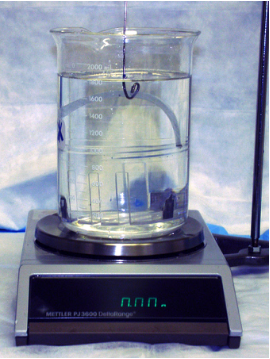
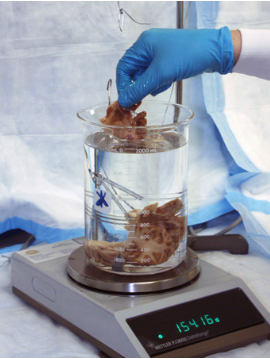
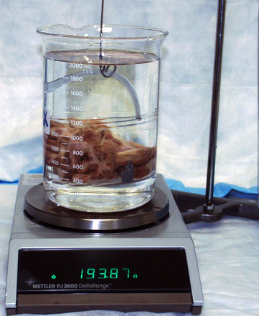

In [13]:
#install.packages("BayesFactor")
library(BayesFactor)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘pbapply’, ‘MatrixModels’, ‘hypergeo’




The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//RtmpWyrkNc/downloaded_packages


Loading required package: coda

Attaching package: ‘coda’

The following object is masked from ‘package:arm’:

    traceplot

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


In [1]:
library(gridExtra)
library(brm)
library(lme4)
library(ggthemes)
library(leaps)
library(glmnet)
library(plot3D)
library(ggfortify)
library(mediation)
library(tidyverse)
library(arm)
library(ggbeeswarm)
library(forcats)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: ggplot2
Loading required package: MASS
Loading required package: mvtnorm
Loading required package: sandwich
mediation: Causal Mediation Analysis
Version: 4.4.7

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::combine()    masks gridExtra::combine()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::select()     masks MASS::select()
✖ purrr::when()       masks foreach::when()

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/sdienel/Dienel_DSPN_S19



In [2]:
options(repr.matrix.max.rows = 200, repr.matrix.max.columns = 50)

## III. Variables
We collect brain tissue specimens, with permission of the next of kin, from autopsy cases at the Allegheny County Medical Examiner's Office. At the time of tissue collection, brain volume measurements are made.  

A 'psychological autopsy' autopsy is performed and through next-of-kin interviews and medical record reviews, a consensus DSM-V diagnosis is made for each case.  

The subjects used here were pulled based on 1) available brain volume measurements and 2) a final consensus diagnosis made.  

The first question in this study is to assess which antemortem (race, sex, age, height, weight, and cause of death) and postmortem (postmortem interval (PMI), or the time between death and tissue recovery) factors might influence brain tissue volumes in the psychiatric control subjects.

The second question is assessing whether any of the diagnostic groups (ETOH, MDD, BP, or SCHIZO) exhibit lower brain tissue volumes compared to control subjects.


Random variables that will be accounted for include the human subject number, which accounts for the variability in instrument measurement over time (lower HU numbers were collected earlier than higher HU numbers).

#### Review of Variables
Psychiatric Diagnosis  
Human Subject Number (HU_NUM)  
Sex  
Age  
Age at Onset of Illness  
Duration of Illness  
Years of Remission  
Race  
Height  
Weight  
Manner of Death   
Post-mortem Interval (PMI)  
Fresh Brain Cerebral Volume (primary continuous response variable)  
Mild or Moderate/Severe Alcohol Use Disorder (if an AUD is present)  
Presence of Absence of Comorbid AUD  
Presence of Schizoaffective Disorder in the schizophrneia cohort  
Time of Brain Tissue Volume Taken (indexed by human subject number) - random variable  

## IV. Hypotheses
##### The specific hypothesis that I am interested in is to test the prediction that left hemisphere brain volume will be significantly lower than control subjects for the schizophrenia and alcohol-use disorder variable groups, and the deficit observed in schizophrenia subjects is true regardless of a comorbid alcohol use disorder.

We predict that left hemisphere brain tissue volume (our dependent continuous variable $y$) will be significantly different in the SCZ and ETOH groups, but not the MDD and BP groups, from control subjects. We will be using linear regression (rather than classifier models), as volume output is a quantitative continuous variable. This basic 

$y_{volume}$  
$x_{diagnosis}$  
$x_{ETOHseverity}$  
$x_{age}$  
$x_{sex}$  
$x_{ETOHpres}$ or a comorbid alcohol use disorder diagnosis .  
$x_{height}$  
$x_{weight}$  
$x_{PMI}$

  
The form of the hypothesis that we want to test is as follows: after accounting for the variation in brain volume due to sex and age, how much of the variability in the data is explained by psychiatric diagnosis? Which diagnoses are significantly different than control subjects? In other words:

$ Y_{volume} = \beta_0 + \beta_{diagnosis}x_{diagnosis} + + \beta_{sex}x_{sex} + + \beta_{age}x_{age} + + \beta_{height}x_{height}+  \beta_{diagnosis*age}x_{diagnosis*age} + \beta_{race}x_{race} + \beta_{ETOHseverity}x_{ETOHseverity} + \beta_{weight}x_{weight} + \beta_{PMI}x_{PMI} + \epsilon $

## V. Data Organization

The data are organized as a data frame, with the subject identifier in the first column and a number of descriptors.  

The data are drawn from an Access Database and we have *a priori* determined which subjects we want to use. Specifically, we only started collecting brain volumes after subject number HU 1274, so we only want to include values with something higher than HU 1274. The data from Access are exported into an Excel sheet, which will be saved as a .csv and imported into R.

Key data cleansing steps include:
* In the areas that are blank, filling in "NA" so that there are no missed rows
* Many of the diagnoses in the dataframe are listed as DSM-V codes that will be challenging to interpret. Thus, I will transform these columns into Yes/No binary options and organize into the following groups:
    + Alcohol Use Disorder (ETOHpres; meaning, is any evidence of an alcohol use disorder present?)
    + Mood Symptoms (important for schizophrenia subjects to differentiate between schizoaffective and schizophrenia)
    + Alcohol Use Severity (for the subjects with an alcohol use disorder, was it characterized as mild or moderate/severe?)
* Eliminating unused variables (columns)
* Adding HU subject number as a random factor requires it to be a categorical variable.
* Eliminating subjects without a brain tissue volume measurement made.
* Eliminate subjects with unusual or unexpected DSM-V codes.


In [4]:
volumetable <- read.csv("Volume_R.csv", header=TRUE, na.strings=c("","NA"))
summary(volumetable$GROUP)
volumetable <- volumetable %>% 
rename("fresh_cerebrum_volume" = "Fresh_LeftCerebrum_Tissue_Volume",
       "fresh_total_volume" = "Fresh_Total_Tissue_Volume",
       "frozen_total_volume" = "Frozen_Total_Tissue_Volume",
       "frozen_cerebrum_volume" = "Frozen_LeftCerebrum_Tissue_Volume",
       "Diagnosis" = "GROUP",
       "race" = "RIDENT"
      )
volumetable <- mutate(volumetable, sex = ifelse(grepl("1", sex), "Male",
                                                ifelse(grepl("2", sex), "Female",
                                                    "NA")))
volumetable <- mutate(volumetable, race = ifelse(grepl("C", race), "African American",
                                                ifelse(grepl("E", race), "Caucasian",
                                                      "Other")))
summary.factor(volumetable$race)
summary.factor(volumetable$sex) #confirms the dplyr mutation worked

BP CONTROL    ETOH     MDD  SCHIZO 
     26     186     148     168      41

African American        Caucasian            Other 
              88              477                4

Female   Male 
   156    413

In [7]:
head(volumetable)
#this step filters out any rows of HU subjects which did not have volume data.
volumetable1 <- volumetable %>%
filter(fresh_total_volume != " NA")
summary(volumetable1$Diagnosis) #confirm the filtering worked as expected. 
#There were 4 control subjects and 1 ETOH subject without volume table

Diagnosis,HU_NUM,sex,age,medslist_atod,DSMIV,AGEONSET,DURATION,REMISLEN,COMMENT,⋯,Fresh_Measurer,fresh_total_volume,fresh_cerebrum_volume,Frozen_Date,Frozen_Measurer,Frozen_Time,frozen_total_volume,frozen_cerebrum_volume,Total_VolumeChange,LeftCerebrum_VolumeChange
CONTROL,1274,Male,73.08,"CARDIZEM, CARDURA, COLCHICINE, PEPCID",NA,NA,NA,NA,NA,⋯,Enis,689.9,589.2,NA,NA,NA,NA,NA,NA,NA
CONTROL,1276,Female,57.61,"HUMULIN, LIPITOR",NA,NA,NA,NA,NA,⋯,Enis (+ KADP),588.3,516.5,NA,NA,NA,NA,NA,NA,NA
CONTROL,1278,Male,50.22,NA,NA,NA,NA,NA,NA,⋯,MOLLY,704.1,613.7,NA,NA,NA,NA,NA,NA,NA
CONTROL,1280,Female,50.72,NA,NA,NA,NA,NA,NA,⋯,ES,609.8,524.4,2005-05-05,ES,20,453.3,378.9,-0.2566907,-0.2775553
CONTROL,1282,Female,39.75,NA,NA,NA,NA,NA,NA,⋯,ES,595.2,518.5,2005-05-17,ES,24,435.8,371.9,-0.2678931,-0.2828158
CONTROL,1284,Male,55.71,NA,NA,NA,NA,NA,NA,⋯,ES,635.9,552.9,2005-05-27,ES,29,454.5,390.6,-0.2852493,-0.2935070


BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     147     168      41

In [8]:
volumetable2 <- mutate(volumetable1, ETOHcode = ifelse(grepl("FINAL_305.00", ETOH), "Mild",
                                      ifelse(grepl("FINAL_303.90", ETOH), "Moderate/Severe",
                                  "NA")))
volumetable3 <- mutate(volumetable2, ETOHpres = ifelse(grepl("305.00|303.90", ETOH), "1",
                                      "0"))
summary(volumetable3$SCHIZ)
volumetable4 <- mutate(volumetable3, Schizoaffective_Disorder = ifelse(grepl("295.70", SCHIZ), "1",
                                                                      "0"))
#Need to create a categorical variable for HU_NUM to use it as a random effect.
#Random effects must be categorical variables, so the pseudocontinuous (integer based) HU_NUM won't work
#Using nested ifelse and mutate functions to create a new column titled "HU_NUM_GROUP"
volumetable5 <- mutate(volumetable4, HU_CODE = ifelse(HU_NUM %in% 1200:1299, "1200's",
                                ifelse(HU_NUM %in% 1300:1399, "1300's",
                                ifelse(HU_NUM %in% 1400:1499, "1400's",
                                ifelse(HU_NUM %in% 1500:1599, "1500's",
                                ifelse(HU_NUM %in% 1600:1699, "1600's",
                                ifelse(HU_NUM %in% 1700:1799, "1700's",
                                ifelse(HU_NUM %in% 1800:1899, "1800's",
                                ifelse(HU_NUM %in% 13000:13099, "13000's",
                                ifelse(HU_NUM %in% 13100:13199, "13100's",
                                ifelse(HU_NUM %in% 13200:13299, "13200's",
                                ifelse(HU_NUM %in% 13300:13405, "13300's",
                                NA)))))))))))) 
#rounded the last one; otherwise the final group would only have 2 subjects

#need to filter out ETOH subjects without a final diagnosis
#str(volumetable5)
volumetable5 <- volumetable5 %>%
    filter(DIAGCAT != "ETOH?")

#subtracts 147 subjects to the 134 subjects with a final ETOH diagnosis

#next need to get rid of 1 subject with a DSM-V diagnosis of 'Alcohol Intoxication'

volumetable5 <- volumetable5 %>% subset(volumetable5$ETOH != "FINAL_303.00" | is.na(ETOH))
#This extra steps removes the one subject who has a DSM-V code of 303.00 which is alcohol intoxication. This is
#not indexing a feature we're interested in, as we are only interested in alcohol subjects with a confirmed AUD.
#need to add the is.na because the filtering step eliminates those that fit the criteria AND all na's. 
summary(volumetable5$Diagnosis) #confimrs only 1 ETOH subject was lost after filtering
summary.factor(volumetable5$ETOH) #confirms there is no FINAL_303.00 diagnosis


FINAL_ FINAL_295.10 FINAL_295.30 FINAL_295.40 FINAL_295.70 FINAL_295.90 
           1            1           12            1           19            7 
        PRE_         NA's 
           7          518

BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     133     168      41

FINAL_ FINAL_303.00 FINAL_303.90 FINAL_305.00         PRE_   PRE_303.90 
           3            0          153          100            2            1 
  PRE_305.00         NA's 
           1          292

In [10]:
volumetableclean1 <- volumetable5 %>% dplyr::select(-c(DSMIV, COMMENT, MaxOfNEUROPATH, Positive, HANDED, BWEIGHT,
                                                DX_BASIS, DIAGTIME, DIAGCAT, VOLUME_ALL_ALLCAUSE, VOLUME_ALL_ALLMANNER,
                                                AVAILCOMM, ADRC_CONTROL, ANX, ANX.,
                                                CONTROL, CONTROL., ETOH., MR, PD, HD, MOOD, MOOD., MR., DEMENTIA, 
                                                DEMENTIA., NEURO, NEURO., PSYCH, PSYCH., SCHIZ, SCHIZ., Fresh_Date, 
                                                Fresh_Measurer, fresh_total_volume, Frozen_Date, Frozen_Measurer, 
                                                Frozen_Time, frozen_total_volume, LeftCerebrum_VolumeChange, CONTROL2,
                                                      DRUG, DRUG., ETOH)) 
#need to add the dplyr:: function because 'select' is masked based on the loading of the packages.
head(volumetableclean1)
summary(volumetableclean1$Diagnosis)

Diagnosis,HU_NUM,sex,age,medslist_atod,AGEONSET,DURATION,REMISLEN,race,HEIGHT,⋯,CASEINFOCAUSE,CASEINFOMANNER,PMI,fresh_cerebrum_volume,frozen_cerebrum_volume,Total_VolumeChange,ETOHcode,ETOHpres,Schizoaffective_Disorder,HU_CODE
CONTROL,1274,Male,73.08,"CARDIZEM, CARDURA, COLCHICINE, PEPCID",NA,NA,NA,Caucasian,67,⋯,arteriosclerotic & hypertensive cardiovascular dis,NATURAL,7.57,589.2,NA,NA,NA,0,0,1200's
CONTROL,1276,Female,57.61,"HUMULIN, LIPITOR",NA,NA,NA,Caucasian,67,⋯,Arteriosclerotic cardiovascular disease,NATURAL,14.85,516.5,NA,NA,NA,0,0,1200's
CONTROL,1278,Male,50.22,NA,NA,NA,NA,Caucasian,69,⋯,Arteriosclerotic & hypertensive heart disese,NATURAL,12.95,613.7,NA,NA,NA,0,0,1200's
CONTROL,1280,Female,50.72,NA,NA,NA,NA,Caucasian,63,⋯,pulmonary thromboembolism,NATURAL,23.45,524.4,378.9,-0.2566907,NA,0,0,1200's
CONTROL,1282,Female,39.75,NA,NA,NA,NA,Caucasian,64,⋯,Sudden Cardiac Arrhythmogenic Death,NATURAL,24.47,518.5,371.9,-0.2678931,NA,0,0,1200's
CONTROL,1284,Male,55.71,NA,NA,NA,NA,Caucasian,67,⋯,ASCVD,NATURAL,6.40,552.9,390.6,-0.2852493,NA,0,0,1200's


BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     133     168      41

In [11]:
#Will work on meds analysis at a later time.

---
# VI. Analysis
## Part 1. Are there factors that predict brain tissue volume in psychiatrically unaffected control subjects?
In the first part of exploring the data analysis, I wanted to see which factors significantly affected brain tissue volumes among the control (no psychiatric diagnoses) subjects. To do this, I performed a mixed model using 'fresh_cerebrum_volume' as the response, and sex, age, race, height, weight, brain weight, and 'caseinfomanner' which tells us the manner of death, and PMI. In this mixed model, I used "HU_NUM" as a random effect to evaluate whether there is evidence of systematic differences over time with brain tissue volume measurements in the controls.

[1] 8

[1] 0

[1] 184

[1] 176

BP CONTROL    ETOH     MDD  SCHIZO 
      0     176       0       0       0

[1] "Age"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.47   45.74   51.74   50.47   58.34   74.42 

[1] "Sex"


Female   Male 
    41    135

[1] "Race"


African American        Caucasian            Other 
              33              141                2

[1] "PMI"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.80   13.72   18.52   18.49   23.89   38.68 


Call:
lm(formula = fresh_cerebrum_volume ~ sex + age + WEIGHT + HEIGHT + 
    PMI + race + CASEINFOMANNER, data = controlclean)

Residuals:
    Min      1Q  Median      3Q     Max 
-146.09  -28.70   -3.54   28.17  121.61 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           320.31902   85.62351   3.741 0.000252 ***
sexMale                67.41718   10.58027   6.372 1.75e-09 ***
age                    -0.52615    0.28257  -1.862 0.064354 .  
WEIGHT                 -0.09880    0.07023  -1.407 0.161319    
HEIGHT                  3.32100    1.32636   2.504 0.013245 *  
PMI                     0.52776    0.50422   1.047 0.296757    
raceCaucasian          22.02576    8.96766   2.456 0.015068 *  
raceOther              -6.06224   33.56685  -0.181 0.856899    
CASEINFOMANNERNATURAL  -5.41409    8.94088  -0.606 0.545640    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.97 on 167 degrees of freed

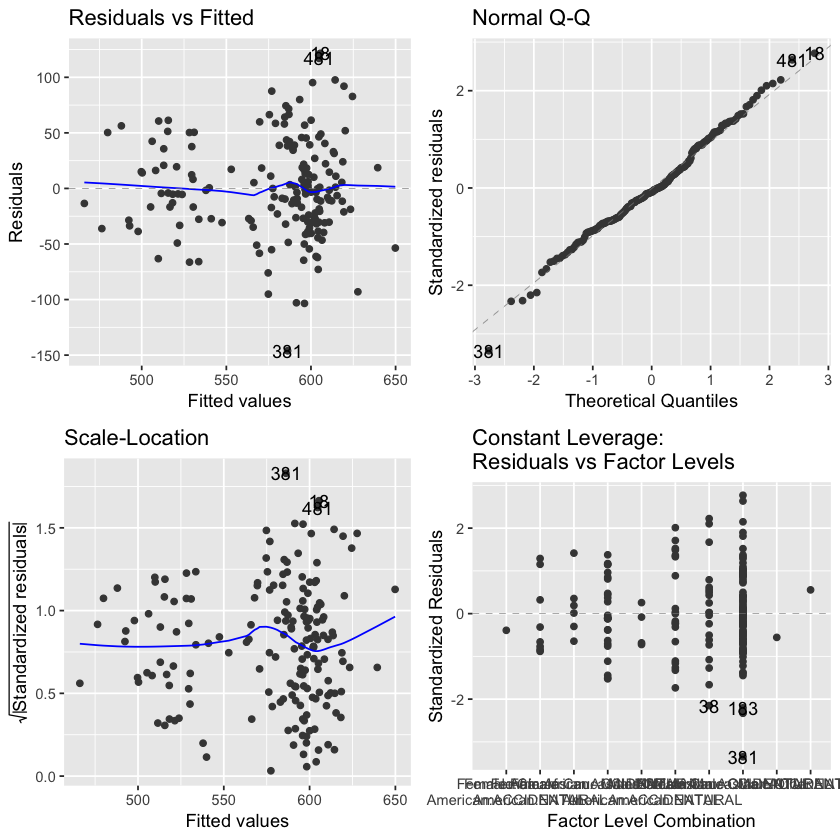

In [12]:
#create a table of just the control subjects
control <- subset(volumetableclean1, Diagnosis == "CONTROL")
control <- control %>% dplyr::select(-c(medslist_atod, AGEONSET, DURATION, REMISLEN, ETOHcode, ETOHpres, 
                                        Schizoaffective_Disorder, frozen_cerebrum_volume, Total_VolumeChange))
controlclean <- na.omit(control)
sum(is.na(control))
sum(is.na(controlclean)) #gets rid of 8 subjects with missing variables.
length(control$fresh_cerebrum_volume)
length(controlclean$fresh_cerebrum_volume)

#Descriptive Stats
summary(controlclean$Diagnosis)
print("Age")
summary(controlclean$age)
print("Sex")
summary.factor(controlclean$sex)
print("Race")
summary.factor(controlclean$race)
print("PMI")
summary(controlclean$PMI)

#linear model with key predictors
lmcontrol <- lm(fresh_cerebrum_volume ~ sex + age + WEIGHT + HEIGHT + PMI + race + CASEINFOMANNER, data = controlclean)
summary(lmcontrol)
autoplot(lmcontrol)

##### From this linear model, sex has the greatest estimate for brain tissue volume, followed by race, then height, and to a much smaller degree, age. To gain more insight into this finding, I've plotted the findings in a number of ways below.

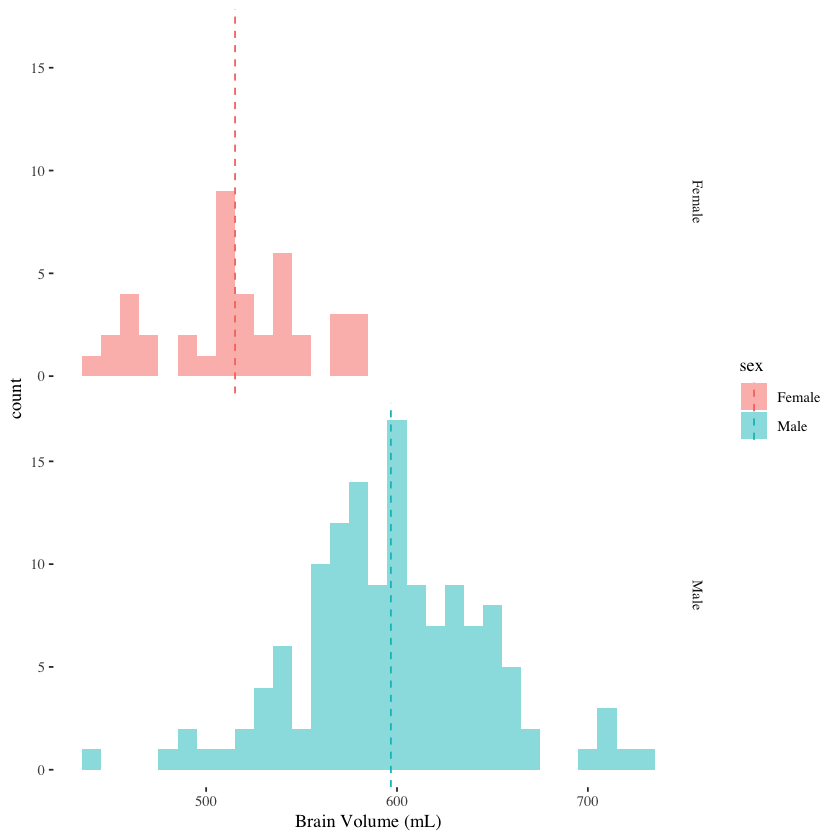

In [14]:
groupmu <- controlclean %>%
            group_by(sex) %>%
                summarize(mean_sex = mean(fresh_cerebrum_volume))
histocontrol <- ggplot(aes(fresh_cerebrum_volume, fill = sex), data = controlclean) +
                geom_histogram(binwidth = 10, alpha = 0.3, position="identity") +
                scale_x_continuous(name="Brain Volume") +
                geom_vline(data = groupmu, aes(xintercept=mean_sex, color = sex), linetype="dashed") +
                theme_tufte()
histobysex <- ggplot(aes(fresh_cerebrum_volume, fill=sex), data = controlclean) + 
                geom_histogram(binwidth=10, alpha=0.5) +
                facet_grid(sex ~ .) +
                geom_vline(data = groupmu, aes(xintercept=mean_sex, color=sex), linetype="dashed") +
                scale_x_continuous(name="Brain Volume (mL)") +
                theme_tufte()
histobysex

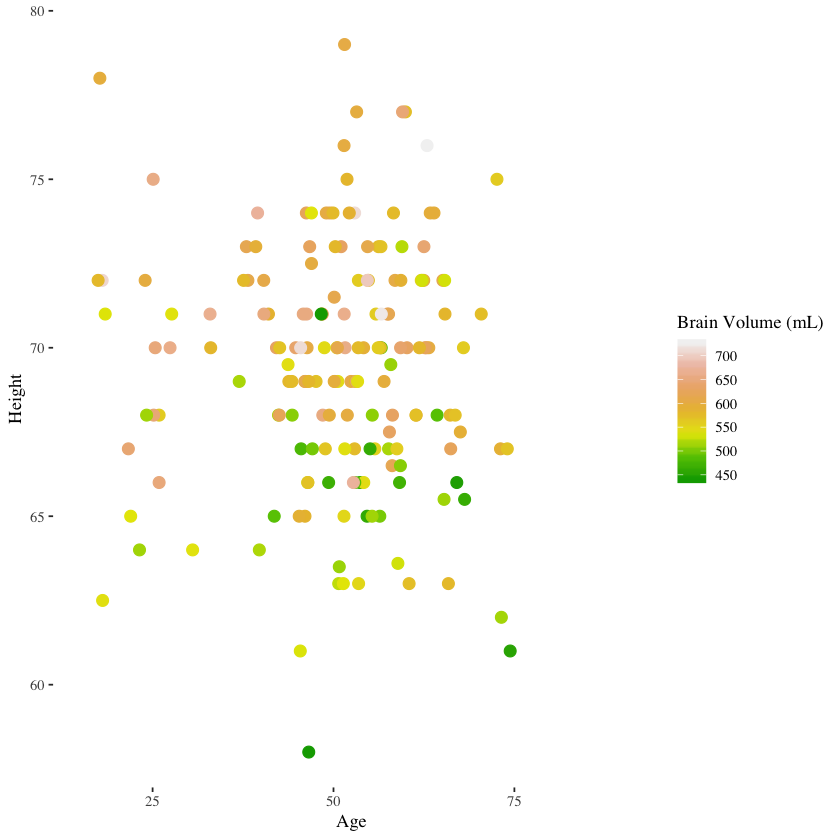

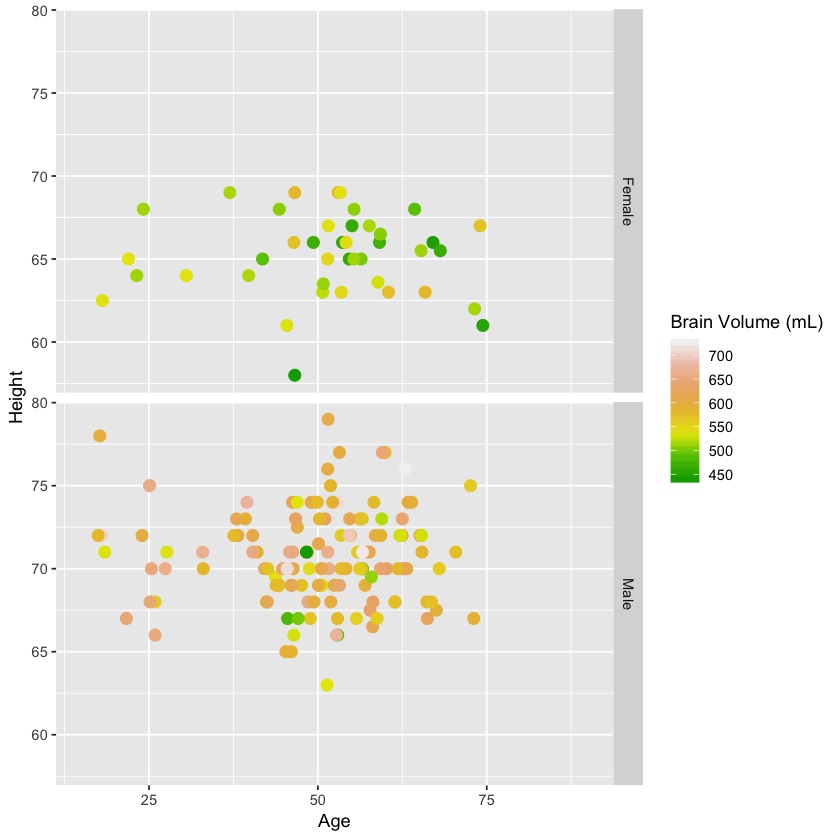

In [15]:
colorplotcontrol <- ggplot(aes(age, HEIGHT, col = fresh_cerebrum_volume), data = controlclean) + 
                    geom_point(size = 3) +
                    scale_color_gradientn(name = "Brain Volume (mL)", colours = terrain.colors(7)) +
                    theme_tufte() +
                    ylab("Height") + xlab("Age") + xlim(15, 90)
colorplotcontrol
#ggsave("colorplotcontrol.pdf")
colorplotbysex <- ggplot(aes(age, HEIGHT, col = fresh_cerebrum_volume), data = controlclean) + 
                    geom_point(size = 3) +
                    scale_color_gradientn(name = "Brain Volume (mL)", colours = terrain.colors(7)) +
                    ylab("Height") + xlab("Age") + xlim(15, 90) +
                    facet_grid(sex ~ .)
colorplotbysex
#ggsave("colorplotbysex.pdf")

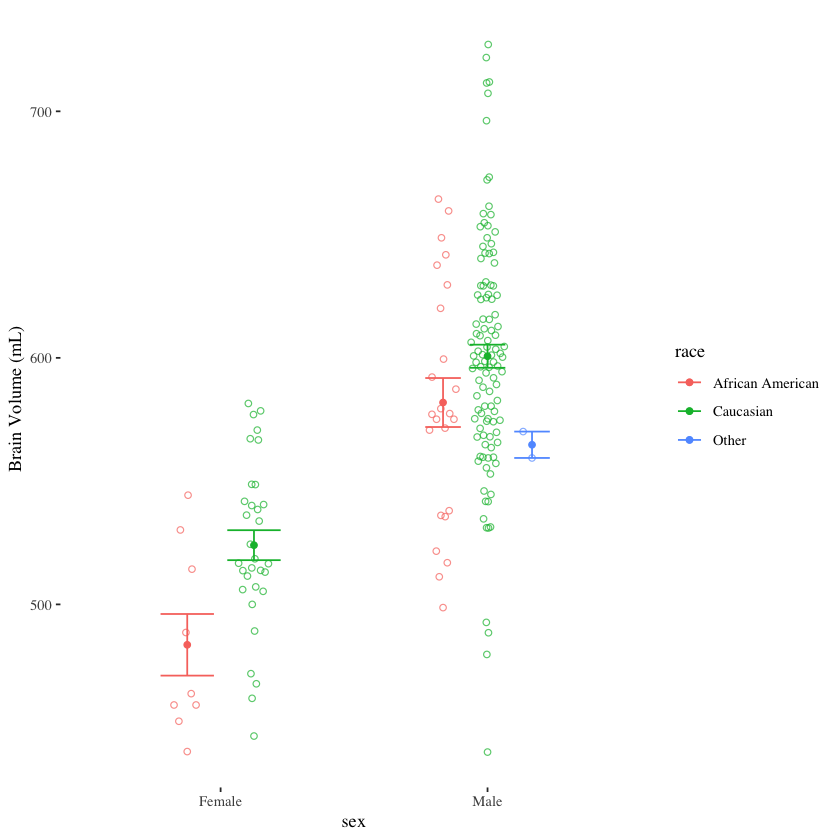

In [16]:
racescatter <- ggplot(aes(sex, fresh_cerebrum_volume, col=race), data = controlclean) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7)
                   # scale_colour_manual(values = c("black", "red"))
racescatter <- racescatter + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.4, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            ylab("Brain Volume (mL)")
racescatter
#ggsave("racescatter.pdf")

---
### Moderation/Mediation

##### Looking at these data, it seems like the effect of sex might be mediated by height (men tend to be taller on average than women). To assess for this possibility, I used a mediation model.

In [17]:
#need the factors to be in dummy variables for the mediator package.
mediatortable <- mutate(controlclean, sex_code = ifelse(sex == "Male", "1", "0"))
mediatortable2 <- mutate(mediatortable, race_code = ifelse(race == "Caucasian", "1", "0"))
set.seed(5)
mediator.fit <- lm(HEIGHT ~ sex_code + age + race_code, data = mediatortable2)
outcome.fit <- glm(fresh_cerebrum_volume ~ sex_code + HEIGHT + age + race_code, data = mediatortable2)
mediator.outcome <- mediate(mediator.fit, outcome.fit, boot=TRUE, treat = "sex_code", mediator = "HEIGHT", sims = 500)
summary(mediator.outcome)


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            14.6523       3.2098        27.12   0.012 *  
ADE             65.4732      46.2529        82.92  <2e-16 ***
Total Effect    80.1256      65.5294        92.92  <2e-16 ***
Prop. Mediated   0.1829       0.0389         0.35   0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 176 


Simulations: 500 


##### Interpreting the summary output from the mediation package, the average direct effect (ADE) is much larger than the estimate for the average causal mediation effects (ACME), although the ACME is still statistically significant. This suggests the differences in brain volume due to sex might be partially mediated by height. The direct effect is the effect of X (sex) on Y (brain volume) after accoutning for the $m$ mediating variable, in this case, height.

---
### LASSO Model
It seems that the best model for predicting brain tissue volume among control subjects is height, age, race, and sex. Let's find the best model fit using LASSO which includes feature selection by bringing non-predictive terms to zero.

In [19]:
names(controlclean)

[1] "Diagnosis"             "HU_NUM"                "sex"                  
 [4] "age"                   "race"                  "HEIGHT"               
 [7] "WEIGHT"                "CASEINFOCAUSE"         "CASEINFOMANNER"       
[10] "PMI"                   "fresh_cerebrum_volume" "HU_CODE"

[1]  12 100

Lambda,MSE
OLS,2827.308
Lambda 1,2756.463
Lambda 2,2744.205
Lambda 3,2744.283
Lambda 4,2751.278
Lambda 6,2773.044
Lambda 8,2824.154
Lambda 10,2919.417
Lambda 100,4055.734
Lambda 1000,4055.734


[1] 2.908462

[1] 1.067624

[1] 2743.816

(Intercept)               sexMale                   age 
        369.195233934          61.578577840          -0.337870568 
        raceCaucasian                HEIGHT                WEIGHT 
         17.390444465           2.365344817          -0.009798106 
CASEINFOMANNERNATURAL                   PMI 
         -0.219363082           0.140654852

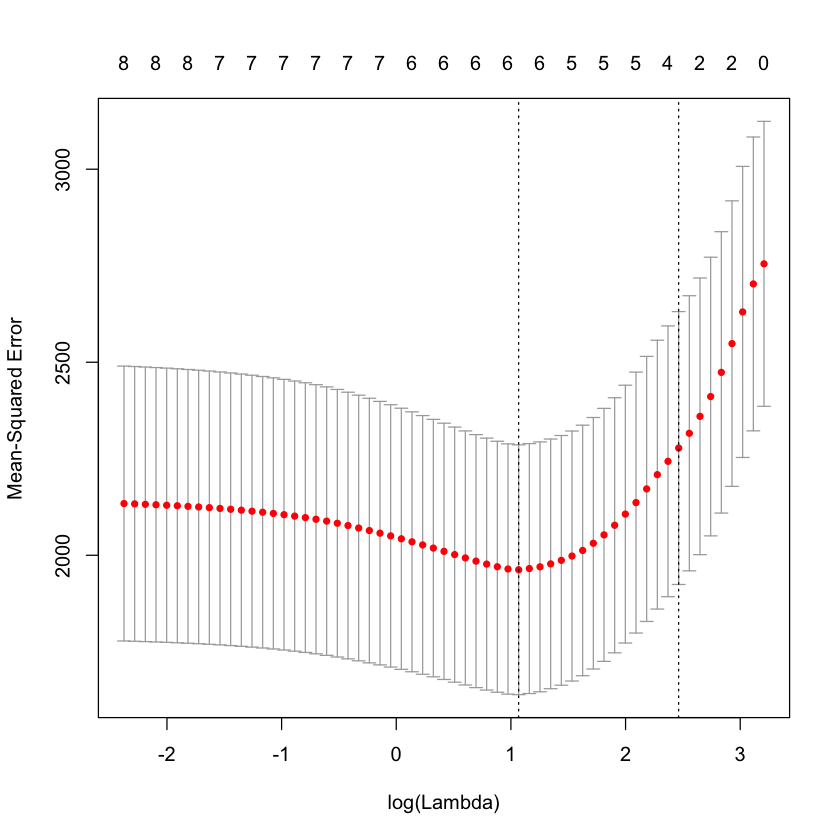

In [20]:
controltablelasso <- controlclean %>% select(-c(
                        HU_NUM, HU_CODE, Diagnosis, CASEINFOCAUSE)) # only want a table with the response (fresh_cerebrum_volume) 
                                                    #all predictors for the lasso model
x = model.matrix(fresh_cerebrum_volume~., controltablelasso) [, -1]
y = controltablelasso$fresh_cerebrum_volume
grid = 10^seq(10, -2, length=100) #creates a search space from (10^10): (10^-2), 100 samples long
lasso.control = glmnet(x, y, alpha = 1, lambda = grid)
dim(coef(lasso.control)) #so we have 12 rows for each of the 11 predictors + interceptor and 100 columns for each
#value of lambda
#next, split dataset into testing and training datasets
set.seed(5)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test = y[test]
lasso.ctlmod <- glmnet(x[train,], y[train], alpha = 1, lambda = grid, thresh=1e-12)
lasso.pred = predict(lasso.ctlmod, s = 0, newx = x[test ,])
lambda0 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1, newx = x[test ,])
lambda1 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 2, newx = x[test ,])
lambda2 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 3, newx = x[test ,])
lambda3 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 4, newx = x[test ,])
lambda4 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 6, newx = x[test ,])
lambda6 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 8, newx = x[test ,])
lambda8 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 10, newx = x[test ,])
lambda10 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 100, newx = x[test ,])
lambda100 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1000, newx = x[test ,])
lambda1000 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1e10, newx = x[test ,])
lambda1e10 <- mean((lasso.pred-y.test)^2)

Lambda <- c("OLS", "Lambda 1", "Lambda 2", "Lambda 3", "Lambda 4", "Lambda 6", "Lambda 8", "Lambda 10", "Lambda 100", "Lambda 1000", "Lambda 1e10")
MSE <- c(lambda0, lambda1, lambda2, lambda3, lambda4, lambda6, lambda8, lambda10, lambda100, lambda1000, lambda1e10)
lambtable <- data.frame(Lambda, MSE)

lambtable

#now need to predict 
set.seed(5)
cv.out = cv.glmnet(x[train,], y[train], alpha = 1)
bestlam = cv.out$lambda.min
bestlam #the best lambda is given as 2.9085
plot(cv.out)
log(bestlam) #the first dotted line on the plot shows where log(bestlam) is.

#finally, need to find the MSE associated with the best lambda and refit the lasso by cross-validation
lasso.bestctl = predict(lasso.ctlmod, s = bestlam, newx = x[test ,])
mean((lasso.bestctl-y.test)^2) #2743.81 is the lowest possible MSE.
out = glmnet(x, y, alpha = 1)
alllassocoef = predict(out, type = "coefficients", s = bestlam)[1:12 ,]
alllassocoef[alllassocoef !=0]

##### Interpreting the results of this LASSO model, none of the terms dropped out completely, although many are not much higher than 0. From this, the three best predictors are sex, race, and height, in descending order of coefficients. Age is next in the rank ordering, but is still less than 0 in terms of its coefficient.

---
### Mixed Models

One other random factor that I am interested in is the time in history when the brain volume measurement over time. This could index 


In [21]:
#use lme4 package
mlmcontrol <- lmer(fresh_cerebrum_volume ~ sex + age + PMI + race + HEIGHT + WEIGHT + CASEINFOMANNER + (1|HU_CODE), data = controlclean)
summary(mlmcontrol)

rlmcontrol <- lm(fresh_cerebrum_volume ~ sex + age + race + HEIGHT, data = controlclean)
rmlmcontrol <- lmer(fresh_cerebrum_volume ~ sex + age + race + HEIGHT + (1|HU_CODE), data = controlclean)

Linear mixed model fit by REML ['lmerMod']
Formula: fresh_cerebrum_volume ~ sex + age + PMI + race + HEIGHT + WEIGHT +  
    CASEINFOMANNER + (1 | HU_CODE)
   Data: controlclean

REML criterion at convergence: 1799.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1918 -0.6309 -0.0825  0.6941  2.6389 

Random effects:
 Groups   Name        Variance Std.Dev.
 HU_CODE  (Intercept)   27.47   5.241  
 Residual             1996.58  44.683  
Number of obs: 176, groups:  HU_CODE, 11

Fixed effects:
                       Estimate Std. Error t value
(Intercept)           321.62355   85.89598   3.744
sexMale                67.95160   10.57332   6.427
age                    -0.53445    0.28153  -1.898
PMI                     0.52783    0.50310   1.049
raceCaucasian          22.37075    8.97547   2.492
raceOther              -5.09708   33.50144  -0.152
HEIGHT                  3.29858    1.32974   2.481
WEIGHT                 -0.09917    0.07013  -1.414
CASEINFOMANNERNATURAL  -5.27

In [23]:
criteria <- AIC(lmcontrol, mlmcontrol, rlmcontrol, rmlmcontrol)
criteria
#criteria2 <- AIC(rlmcontrol, rmlmcontrol)
#criteria2 #This is the AIC between
#criteria3 <- AIC(lmcontrol, rlmcontrol)
#criteria3

,df,AIC
lmcontrol,10,1849.925
mlmcontrol,11,1821.922
rlmcontrol,7,1847.698
rmlmcontrol,8,1822.737


##### Above, the first model is the full linear model with all covariates included. The second is the same linear model but this time including the random effect of HU number. The rlmcontrol model is the model with only the 4 most predictive variables included, and the rmlmcontrol is the same model but including the random effect of HU number. In both cases, the AIC is lower in the models with the included random effect. This suggests that the random effect does contribute to the ability of the model to predict variance in the brain volume data. This finding should be investigated further to find evidence of measurement error over time, either due to changing personel or equipment measurement precision drift.

---
## Part 2. Which psychiatric diagnoses are associated with lower brain tissue volumes?

##### I wanted to explore the data in the various diagnostic groups to uncover which diagnostic groups might differ from the control subjects in their group-wide brain tissue volume. I plotted the data below with 95% confidence intervals.

In [24]:
schiztable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis =="SCHIZO")
etohtable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "ETOH")
mddtable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "MDD")
bipolartable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "BP")
summary(etohtable$Diagnosis)

BP CONTROL    ETOH     MDD  SCHIZO 
      0     184     133       0       0

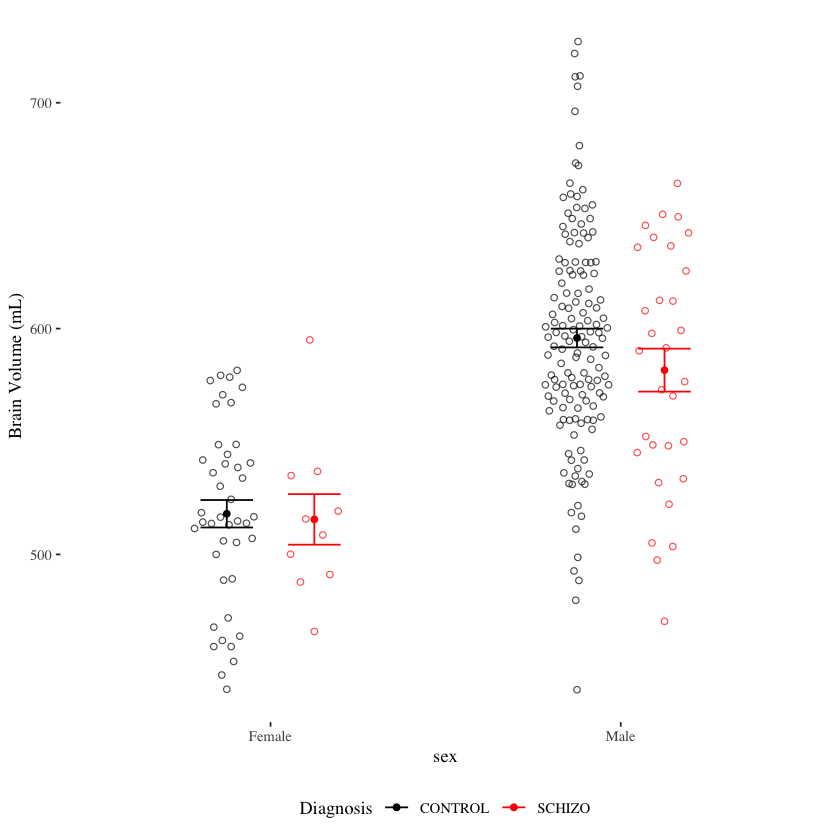

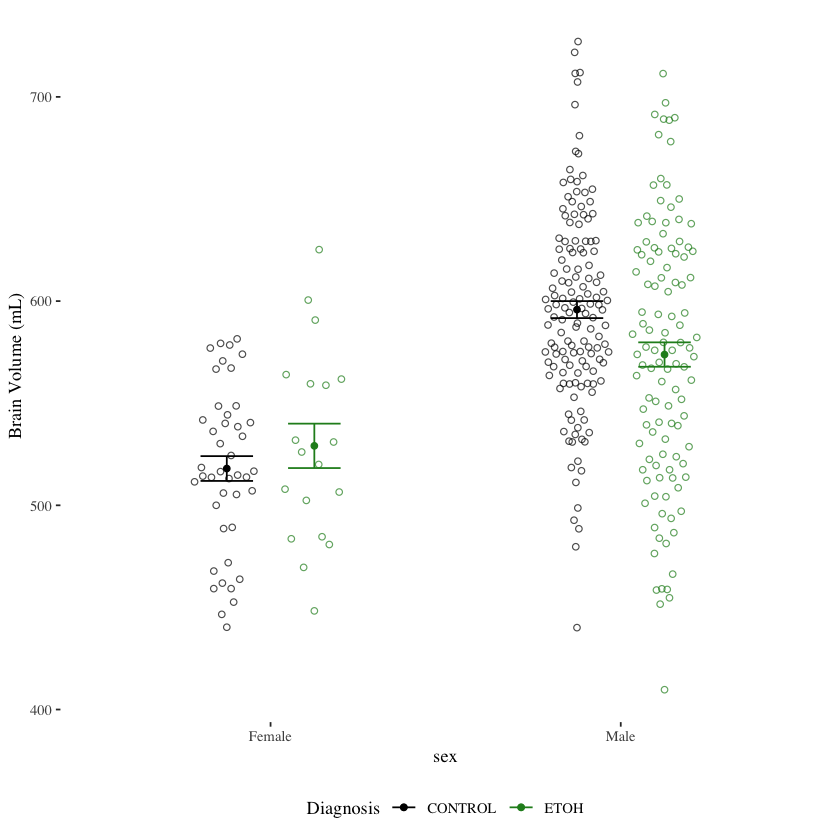

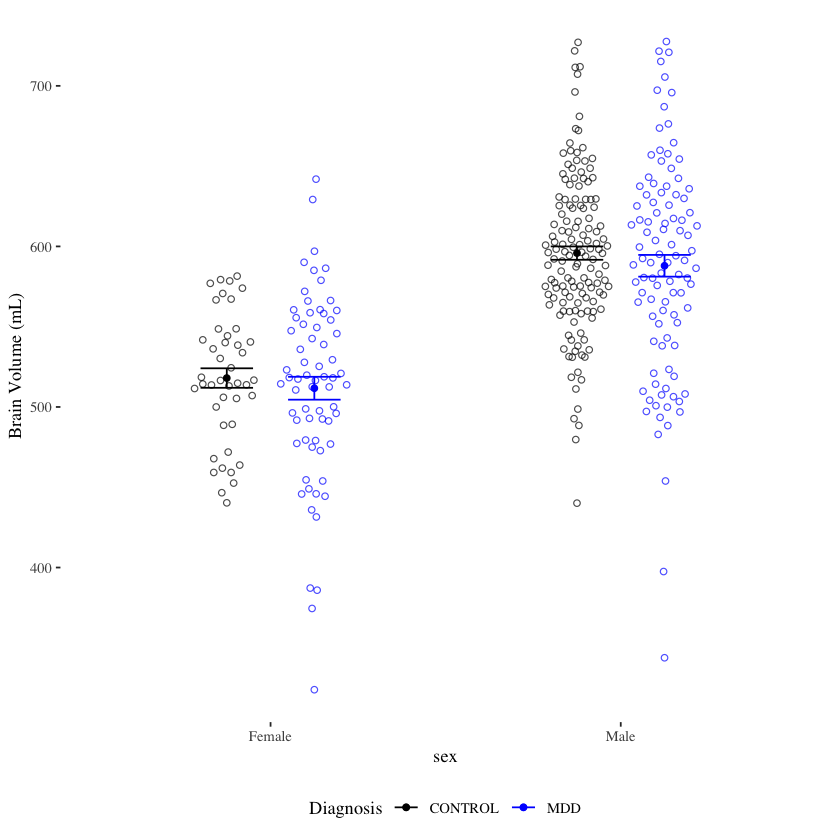

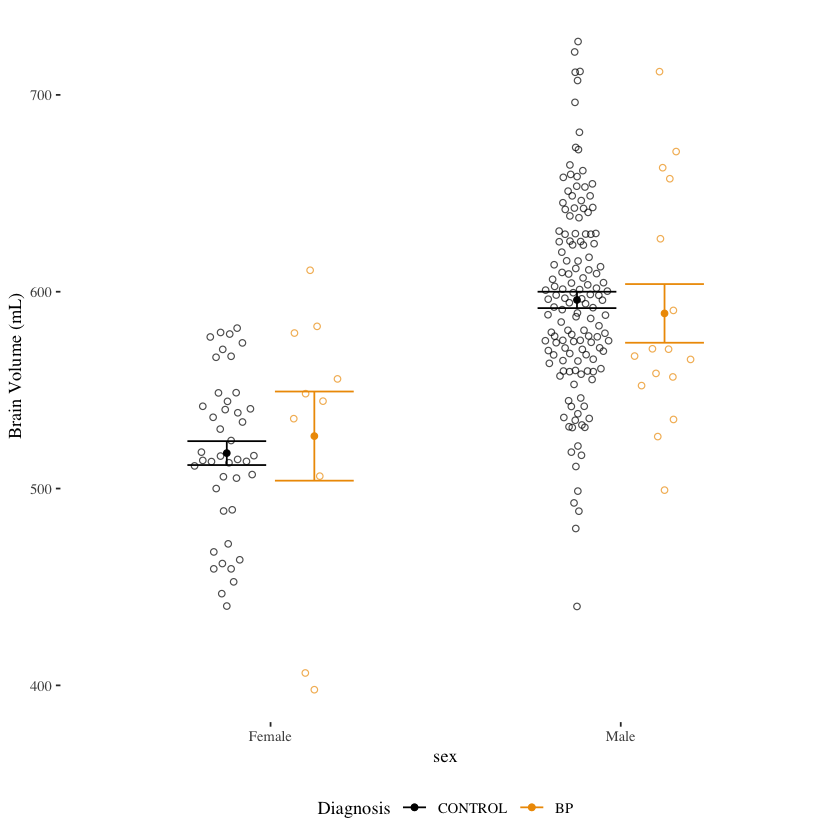

In [25]:
scatterschiz <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = schiztable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "red"))
scatterschiz <- scatterschiz + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() + 
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")


scatteretoh <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = etohtable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "forestgreen"))
scatteretoh <- scatteretoh + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")


scattermdd <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis, group = Diagnosis), data = mddtable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "blue"))
scattermdd <- scattermdd + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")

bipolartable$Diagnosis <- factor(bipolartable$Diagnosis, levels = c("CONTROL", "BP"))
scatterbp <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = bipolartable) +
            geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
            scale_colour_manual(values = c("black", "orange2"))
           # scale_x_discrete(limits=c(CONTROL, BP))
scatterbp <- scatterbp + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.5, fun.args = list(mult=1),
                           position = position_dodge2(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge2(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")

#grid.arrange(scatterschiz, scatteretoh, scattermdd, scatterbp, ncol = 2)
scatterschiz
#ggsave("scatterschiz.pdf")
scatteretoh
#ggsave("scatteretoh.pdf")
scattermdd
#ggsave("scattermdd.pdf")
scatterbp
#ggsave("scatterbp.pdf")
#volumetableclean1$Diagnosis <- factor(volumetableclean1$Diagnosis, levels = c("CONTROL", "BP", "MDD", "ETOH", "SCHIZO"))
#scatterall <-  [...] facet.wrap(~. Diagnosis) will try this another day

##### Both the schizophrenia and ETOH groups appeared to exhibit lower brain tissue volumes, but only in males. This is likely more of a power issue (the available data is strongly biased towards males, due to the nature of the brain collection). I wanted to further investigate this relationship using two linear models, first in the alcohol use disorder group.

In [27]:
lmetoh <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + race + age + ETOHcode, data = etohtable)
summary(lmetoh)
lmetoh2 <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + race + age + ETOHcode + age*Diagnosis, data = etohtable)
summary(lmetoh2)


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    race + age + ETOHcode, data = etohtable)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.136  -30.899   -0.104   28.595  146.384 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             421.5866    69.5648   6.060 4.10e-09 ***
DiagnosisETOH           -11.0034     7.5334  -1.461   0.1452    
sexMale                  55.9697     9.2343   6.061 4.08e-09 ***
HEIGHT                    2.2777     1.0431   2.184   0.0298 *  
raceCaucasian            30.1953     7.4831   4.035 6.94e-05 ***
raceOther                18.7065    35.9068   0.521   0.6028    
age                      -1.3709     0.2274  -6.028 4.89e-09 ***
ETOHcodeModerate/Severe -20.1016     8.8588  -2.269   0.0240 *  
ETOHcodeNA                    NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    race + age + ETOHcode + age * Diagnosis, data = etohtable)

Residuals:
     Min       1Q   Median       3Q      Max 
-161.987  -33.175   -1.969   32.051  159.072 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             394.0604    68.4786   5.755 2.16e-08 ***
DiagnosisETOH            67.4719    22.1652   3.044 0.002543 ** 
sexMale                  59.4088     9.0842   6.540 2.69e-10 ***
HEIGHT                    2.1027     1.0219   2.058 0.040509 *  
raceCaucasian            29.2704     7.3281   3.994 8.19e-05 ***
raceOther                 6.2839    35.2984   0.178 0.858826    
age                      -0.6198     0.2993  -2.071 0.039244 *  
ETOHcodeModerate/Severe -15.7701     8.7468  -1.803 0.072410 .  
ETOHcodeNA                    NA         NA      NA       NA    
DiagnosisETOH:age        -1.6821     0.4481  -3.754 0.0

##### These findings suggest that the ETOH disease effect is strong, but may be mostly explained by the severity of the alcohol use disorder (Moderate/Severe vs Mild) and an interaction between ETOH and age. I decided to explore both of these concepts in the graphs below.

Mild Moderate/Severe              NA 
             53              61             141

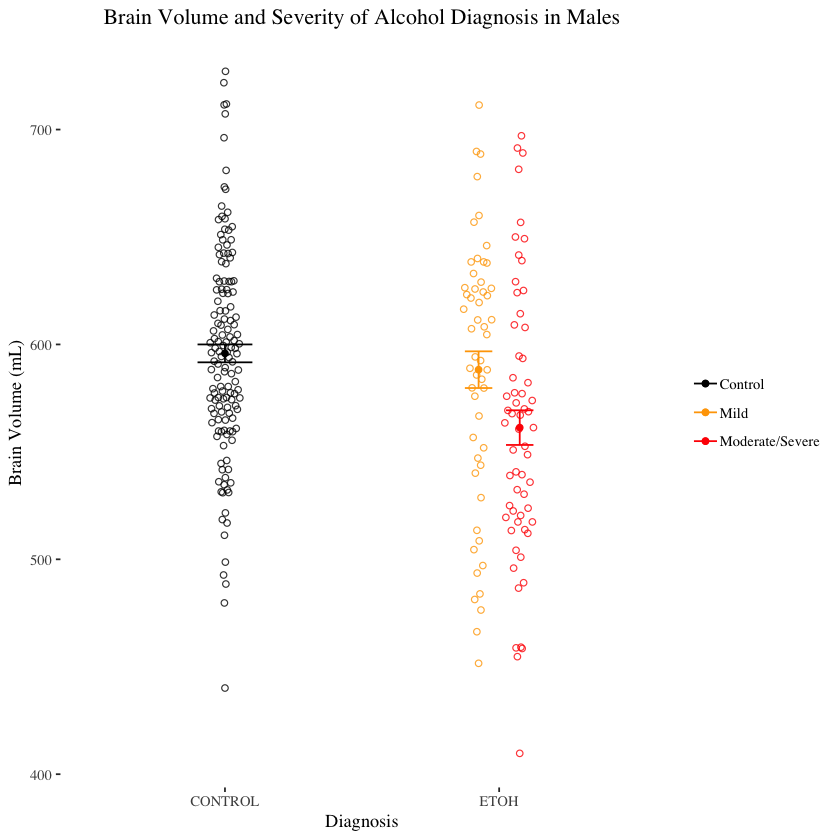

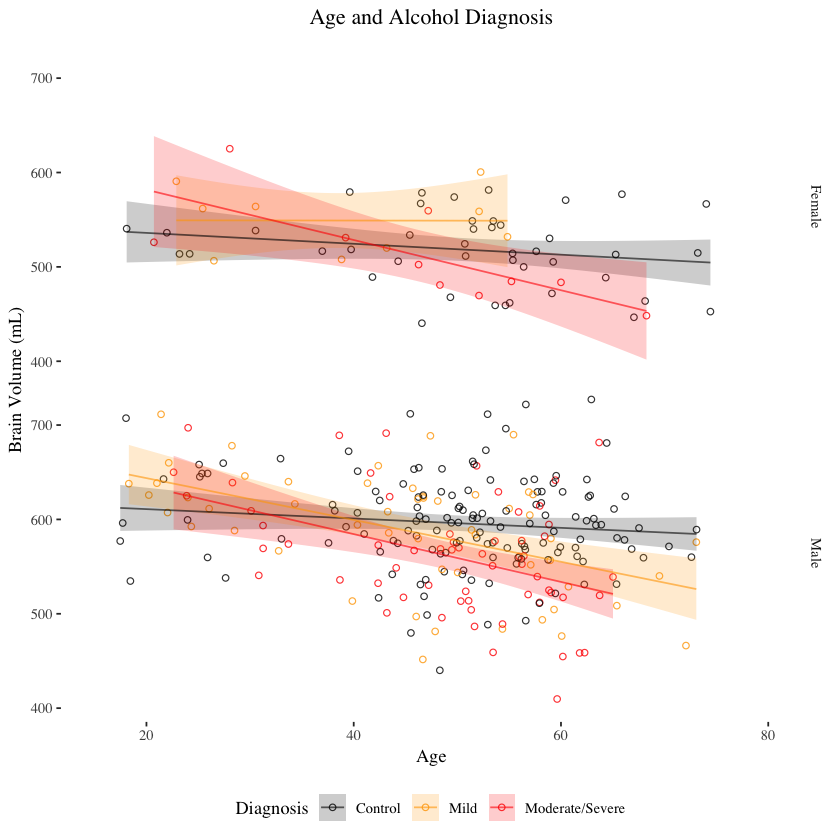

In [29]:
etohmale = subset(etohtable, sex == "Male")
summary.factor(etohmale$ETOHcode)
scatteretohsev <- ggplot(aes(Diagnosis, fresh_cerebrum_volume, col = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                           'Control'))), data = etohmale) +
                    geom_quasirandom(dodge.width = 0.3, shape = "circle open", alpha = 0.8)
                    
        
scatteretohsev1 <- scatteretohsev + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.2, fun.args = list(mult=1),
                           position = position_dodge(width = 0.3)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.3)) +
                            theme_tufte() + 
                            theme(legend.title = element_blank()) +
                            scale_color_manual(values = c('black', 'orange', 'red')) +
                            ylab("Brain Volume (mL)") +
                            ggtitle("Brain Volume and Severity of Alcohol Diagnosis in Males") +
                            theme(plot.title = element_text(hjust = 0.5))
scatteretohsev1
#ggsave("scatteretohsev1males.pdf")
ageetoh <- ggplot(aes(age, fresh_cerebrum_volume, fill = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                           'Control')),
                                                        col = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                           'Control'))), data = etohtable) + 
                        geom_point(shape = "circle open", alpha = 0.8) +
                        geom_ribbon(stat = 'smooth', method = "lm", alpha = 0.2, color = NA) +
                        geom_line(stat = 'smooth', method = 'lm', alpha = 0.6) +
                        #geom_smooth(method = 'lm', se = T, alpha = 0.5) +
                        theme_tufte() +
                        theme(legend.position = "bottom", legend.direction = "horizontal") +
                        labs(fill = "Diagnosis") +
                        labs(color = "Diagnosis") +
                        ylab("Brain Volume (mL)") + xlab("Age") + xlim(15,80) +
                        ggtitle("Age and Alcohol Diagnosis") +
                        theme(plot.title = element_text(hjust = 0.5)) +
                        scale_fill_manual(values = c('black', 'orange', 'red')) +
                        scale_color_manual(values = c('black', 'orange', 'red')) +
                        facet_grid(sex ~ .)
ageetoh
#ggsave("ageetoh.pdf")

##### Together, these data suggest that subjects with an alcohol use disorder might exhibit the greatest deficits in brain volume, but this is mostly due to subjects with a Moderate/Severe alcohol use disorder. Importantly, the disease effect of ETOH interacts with age in ETOH subjects, but not controls, suggesting the deficits may be greater with the duration of alcohol abuse. Future steps should evaluate whether this is due to age*ETOH interaction, or whether it is due to the duration of ETOH abuse.

---
## 3. Is the difference in brain tissue volume observed in schizophrenia subjects attributable to comorbid alcohol use disorders?

##### Because the disease effect is strongest in ETOH subjects but present in male SCHIZ subjects, we wanted to ask whether the findings in male SCHIZ subjects were attributable to comorbid alcohol abuse. I first ran a linear model using ETOH code (Mild vs Moderate/Severe, 'ETOHcode') as well as one using just the presence of a comorbid alcohol use disorder (ETOHpres). I plotted the data and also ran a mediation model. 

In [31]:
lmschiz <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + ETOHcode + race + age, data = schiztable)
summary(lmschiz)
lmschiz2 <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + ETOHpres + race + age, data = schiztable)
summary(lmschiz2)


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    ETOHcode + race + age, data = schiztable)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.395  -30.040   -0.827   31.799  123.637 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             354.3782    73.3027   4.834 2.59e-06 ***
DiagnosisSCHIZO         -22.9426    10.3841  -2.209 0.028239 *  
sexMale                  60.6438     9.3233   6.505 5.70e-10 ***
HEIGHT                    2.9633     1.0914   2.715 0.007180 ** 
ETOHcodeModerate/Severe  10.0881    20.2273   0.499 0.618491    
ETOHcodeNA              -18.5175    17.4664  -1.060 0.290294    
raceCaucasian            27.6328     7.9764   3.464 0.000645 ***
raceOther                 5.3312    32.8278   0.162 0.871149    
age                      -0.6425     0.2446  -2.627 0.009267 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.76 on 208 degrees


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    ETOHpres + race + age, data = schiztable)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.238  -31.939   -2.068   28.877  123.804 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     334.8192    72.3540   4.628 6.49e-06 ***
DiagnosisSCHIZO -20.9012    10.1297  -2.063 0.040314 *  
sexMale          60.2312     9.2683   6.499 5.84e-10 ***
HEIGHT            2.9807     1.0902   2.734 0.006791 ** 
ETOHpres1        19.6011    13.4482   1.458 0.146472    
raceCaucasian    27.7518     7.9522   3.490 0.000589 ***
raceOther         5.6603    32.8168   0.172 0.863227    
age              -0.6436     0.2446  -2.632 0.009133 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.76 on 209 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.4223,	Adjusted R-squared:  0.403 
F-statistic: 21.83 on 

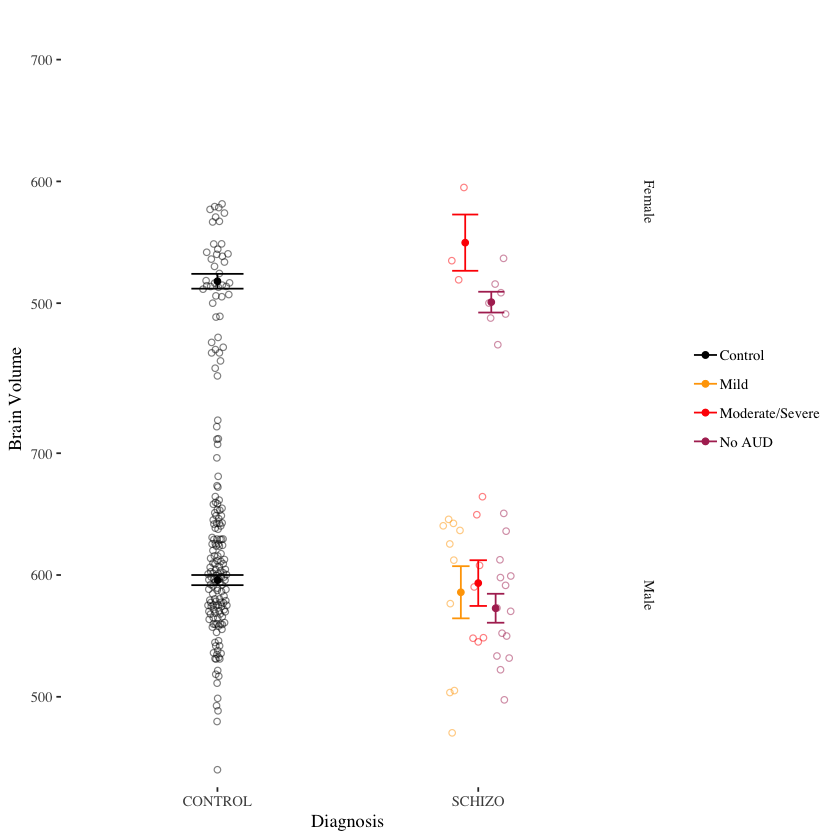

In [33]:
scatterschizetoh <- ggplot(aes(Diagnosis, fresh_cerebrum_volume, col = ifelse(Diagnosis == "SCHIZO" & ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(Diagnosis == "SCHIZO" & ETOHcode == 'Mild', 'Mild',
                                                                                ifelse(Diagnosis == "SCHIZO" & ETOHcode == 'NA', 'No AUD',
                                                                            #ifelse(ETOHpres == "1" & ETOHcode == "NA", "NA",
                                                                            #ifelse(ETOHpres == "0", 'Control',
                                                                           'Control')))), data = schiztable) +
                    geom_quasirandom(dodge.width = 0.3, shape = "circle open", alpha = 0.5)
                    
        
scatterschizetoh1 <- scatterschizetoh + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.2, fun.args = list(mult=1),
                           position = position_dodge(width = 0.2)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.2)) +
                            theme_tufte() + 
                            theme(legend.title = element_blank()) +
                            scale_color_manual(values = c('black', 'orange', 'red', 'maroon')) +
                            ylab("Brain Volume") +
                            facet_grid(sex ~ .)
scatterschizetoh1
#ggsave("scatterschizetoh1.pdf")

Next, I ran a mediation model to see if the presence of ETOH mediated the disease effect.

In [36]:
schizmale = subset(schiztable, sex == "Male")
mediatorschiztable <- mutate(schizmale, race_code = ifelse(race == "Caucasian", "1", "0"))
str(mediatorschiztable)
mediatorschiztable$ETOHpres <- as.numeric(mediatorschiztable$ETOHpres)
mediatorschiztable$race_code <- as.numeric(mediatorschiztable$race_code)
#Need ETOHpres and race_code to be numeric vectors
str(mediatorschiztable)

'data.frame':	172 obs. of  22 variables:
 $ Diagnosis               : Factor w/ 5 levels "BP","CONTROL",..: 2 2 2 2 5 2 2 2 2 5 ...
 $ HU_NUM                  : int  1274 1278 1284 1290 1296 1298 1304 1306 1307 1314 ...
 $ sex                     : chr  "Male" "Male" "Male" "Male" ...
 $ age                     : num  73.1 50.2 55.7 46 48.1 ...
 $ medslist_atod           : Factor w/ 348 levels "ABILIFY, ADDERALL, ADDERALL XR, MELATONIN, SEROQUEL, WELLBUTRIN",..: 209 NA NA 315 10 NA 315 NA NA 104 ...
 $ AGEONSET                : int  NA NA NA NA 13 NA NA NA NA 17 ...
 $ DURATION                : num  NA NA NA NA 35 NA NA NA NA 33 ...
 $ REMISLEN                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ race                    : chr  "Caucasian" "Caucasian" "Caucasian" "Caucasian" ...
 $ HEIGHT                  : num  67 69 67 69 68 70 76 72 71 69 ...
 $ WEIGHT                  : int  218 193 161 161 110 254 240 181 268 150 ...
 $ CASEINFOCAUSE           : Factor w/ 370 levels "Active L

In [37]:
set.seed(5)
mediator.fit <- bayesglm(ETOHpres ~ Diagnosis + age + race_code + HEIGHT, data = mediatorschiztable, family = binomial("logit"))
outcome.fit <- glm(fresh_cerebrum_volume ~ Diagnosis + ETOHpres + HEIGHT + age + race_code, data = mediatorschiztable)
mediator.sch.outcome <- mediate(mediator.fit, outcome.fit, boot=TRUE, treat = "Diagnosis", mediator = "ETOHpres", sims = 500)
summary(mediator.sch.outcome)

Warning message in mediate(mediator.fit, outcome.fit, boot = TRUE, treat = "Diagnosis", :
“treatment and control values do not match factor levels; using CONTROL and SCHIZO as control and treatment, respectively”


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value  
ACME              9.556       -5.951        25.74   0.272  
ADE             -23.556      -48.532        -0.36   0.048 *
Total Effect    -14.000      -33.811         3.94   0.108  
Prop. Mediated   -0.683       -6.395         4.88   0.372  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 166 


Simulations: 500 


##### The significant direct effect and the non-significant causal effect suggest the disease effect is present even accounting for comorbid alcohol use disorders. The graphical representation of the data confirm this notion, where it seems the subset without an alcohol use disorder (AUD) may even have lower brain volumes.

---
## VII. Conclusions  

#### Question 1: What factors explain most of the variation in brain tissue volume in control subjects?
## *Answer: Sex, race, height, and age.*

#### Question 2: Which psychiatric diagnostic groups exhibit altered brain tissue volumes from control subjects?
## *Answer: Subjects with schizophrenia and alcohol use disorders.*

#### Question 3: Is the effect of schizophrenia on brain tissue volume mediated by comorbid alcohol use disorders?
## *Answer: It is unlikely to mediate the schizophrenia associated disease effect.*

## VII. Future Direction

-Evaluate whether alcohol use influences brain tissue volume in the major depression disorder group.  
-Evaluate the effect of medication on brain tissue volume.  
-Further evaluate the random variable of human subject number.  
-Evaluate the duration of illness associated with brain volume deficits in the ETOH group, rather than using age as a proxy for illness duration.